In [1]:
import numpy as np
from numpy import array,newaxis
import math
from math import sqrt,sin, pi, exp
e=math.exp(1)

In [2]:
def real(h,t):#真實值
    c=[]
    a=int(1/h)
    for i in range(0,a+1):
        c.append(e**(-t*pi*pi)*sin(i*h*pi))
    return c
def error(h,dt,r,s):#r是real #s是solution
    N=int(1/h+1)
    a=0
    b=0
    for i in range(0,N):
        a+=((s[i]-r[i])[0])**2
        b+=r[i]**2
    c=a**0.5
    d=b**0.5
    return c/d

In [3]:
#Crank-Nicolson scheme
def a(h,dt):#左邊的矩陣 N*N
    N=int(1/h)+1
    s = (N,N)
    a=np.zeros(s)
    a[0,0]=1
    a[N-1,N-1]=1
    for i in range(1,N-1):
        a[i,i-1]=-dt/2/h**2
        a[i,i+1]=-dt/2/h**2
        a[i,i]=dt/h**2+1
    return a

def s(h): #sin(pi*x)輸入的矩陣 N*1
    c=[]
    a=1/h
    for i in range(0,int(a+1)):
        c.append(sin(i*h*pi))
    d=array(c)[:,newaxis]
    return d
def b(h,dt,f): #右邊的矩陣 N*1
    N=int(1/h)+1
    s = (N,1)
    a=np.zeros(s)
    c=dt/2/h**2
    for i in range(1,N-1):
        a[i]=f[i]+c*(f[i-1]-2*f[i]+f[i+1])
    return a
def sol(h,dt,f):
    return np.linalg.solve(a(h,dt),b(h,dt,f))
def sol2(a,ff,h,dt):  #a=左邊的矩陣,ff=右邊的矩陣
    q=[]
    for i in range(int(1/h)):
        d=np.linalg.solve(a,ff)
        q.append(d)
        ff=b(h,dt,d)
    return q

error01=error(0.1,0.01,real(0.1,0.1),sol2(a(0.1,0.01),b(0.1,0.01,s(0.1)),0.1,0.01)[-1])
error02=error(0.05,0.005,real(0.05,0.1),sol2(a(0.05,0.005),b(0.05,0.005,s(0.05)),0.05,0.005)[-1])
error03=error(0.02,0.002,real(0.02,0.1),sol2(a(0.02,0.002),b(0.02,0.002,s(0.02)),0.02,0.002)[-1])
print(error01,error02,error03)

0.007334793585650208 0.0018302306261121222 0.00029268050470701844


In [4]:
#Simple implicit method
def bb(h,dt,f):#助教左邊的矩陣
        N=int(1/h)+1
        s = (N,1)
        a=np.zeros(s)
        for i in range(1,N-1):
            a[i]=f[i]
        return a
def aa(h,dt):#助教右邊的矩陣
    N=int(1/h)+1
    s = (N,N)
    a=np.zeros(s)
    a[0,0]=1
    a[N-1,N-1]=1
    for i in range(1,N-1):
            a[i,i-1]=-dt/h**2
            a[i,i+1]=-dt/h**2
            a[i,i]=2*dt/h**2+1
    return a
def sol22(h,dt,f):
    return np.linalg.solve(aa(h,dt),bb(h,dt,f))
def sol222(a,ff,h,dt):
    q=[]
    for i in range(int(1/h)):
        d=np.linalg.solve(a,ff)
        q.append(d)
        ff=bb(h,dt,d)
    return q
error1=error(0.1,0.01,real(0.1,0.1),sol222(aa(0.1,0.01),bb(0.1,0.01,s(0.1)),0.1,0.01)[-1])
error2=error(0.05,0.005,real(0.05,0.1),sol222(aa(0.05,0.005),bb(0.05,0.005,s(0.05)),0.05,0.005)[-1])
error3=error(0.02,0.002,real(0.02,0.1),sol222(aa(0.02,0.002),bb(0.02,0.002,s(0.02)),0.02,0.002)[-1])
print(error1,error2,error3)


0.05452086032857704 0.025840284706385188 0.009982458610560319


In [12]:
#做好輸出格式的list
def space(h,dt):#空間
    c=[]
    a=int(1/h)
    for j in range(int(0.1/dt)):
        for i in range(0,a+1):
            c.append(i*h)
    return c
def time(h,dt):#時間
    t=0.1
    c=[]
    a=int(1/h)
    for j in range(1,int(0.1/dt)+1):
        for i in range(0,a+1):
            c.append(j*dt)
    return c
def pt(f):#數值
    c=[]
    for i in range(len(f)):
        for j in range(len(f[1])):
            c.append(float(f[i][j]))
    return c

In [6]:
def output(f1,f2,f3):
    c=[]
    for i in range(len(f1)):
        c.append((f1[i],f2[i],f3[i]))
    return tuple(c)

#Simple implicit method
cv11=output(time(0.1,0.01),space(0.1,0.01),pt(sol222(aa(0.1,0.01),bb(0.1,0.01,s(0.1)),0.1,0.01)))
cv22=output(time(0.05,0.005),space(0.05,0.005),pt(sol222(aa(0.05,0.005),bb(0.05,0.005,s(0.05)),0.05,0.005)))
cv33=output(time(0.020,0.002),space(0.02,0.002),pt(sol222(aa(0.02,0.002),bb(0.02,0.002,s(0.02)),0.02,0.002)))
#crank-nicolson method
cv011=output(time(0.1,0.01),space(0.1,0.01),pt(sol2(a(0.1,0.01),b(0.1,0.01,s(0.1)),0.1,0.01)))
cv022=output(time(0.05,0.005),space(0.05,0.005),pt(sol2(a(0.05,0.005),b(0.05,0.005,s(0.05)),0.05,0.005)))
cv033=output(time(0.020,0.002),space(0.02,0.002),pt(sol2(a(0.02,0.002),b(0.02,0.002,s(0.02)),0.02,0.002)))

In [7]:
path='原始資料.txt'
v=open(path,'w+',encoding='utf-8')
v=open(path,'a+',encoding='utf-8')
def abl(B,v):#B是tupl3,v是txt
    v.write('\n')
    for element in (B):
        c=str(element)+','
        v.write(c)
    v.write('\n')
def ab(C,v):#c是文字
    v.write('\n'+str(C)+'\n')
ab('Crank-Nicolson method',v)    
ab('h=0.1,dt=0.01,error at t=0.1 ='+str(error01),v)
abl(cv011,v)
ab('h=0.05,dt=0.005,error at t=0.1 ='+str(error02),v)
abl(cv022,v)
ab('h=0.02,dt=0.002,error at t=0.1 ='+str(error03),v)
abl(cv033,v)    
ab('Simple implicit method',v)    
ab('h=0.1,dt=0.01,error at t=0.1 ='+str(error1),v)
abl(cv11,v)
ab('h=0.05,dt=0.005,error at t=0.1 ='+str(error2),v)
abl(cv22,v)
ab('h=0.02,dt=0.002,error at t=0.1 ='+str(error3),v)
abl(cv33,v)
v.close()

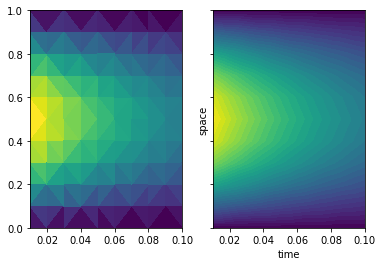

In [9]:
#畫Crank-Nicolson scheme，在h=0.1,dt=0.01，從t=0.01到t=0.1，x=0到1的圖形
import numpy as np
import matplotlib.pyplot as plt
x = array(time(0.1,0.01))
y = array(space(0.1,0.01))
z = array(pt(sol222(aa(0.1,0.01),bb(0.1,0.01,s(0.1)),0.1,0.01)))
f, ax = plt.subplots(1,2, sharex=True, sharey=True)
ax[0].tripcolor(x,y,z)
ax[1].tricontourf(x,y,z, 40) # choose 40 contour levels, just to show how good its interpolation is

plt.xlabel('time')
plt.ylabel('space')
plt.show()


